In [52]:
import numpy as np
from collections import Counter
k=3
def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1 - x2) ** 2))
    return distance

def predict(X):
    predictions = [_predict(x) for x in X]
    return predictions

def _predict(x):
    distances = [euclidean_distance(x, x_train) for x_train in X_train]
    k_indices = np.argsort(distances)[:k]
    k_nearest_labels = [y_train[i] for i in k_indices]
    most_common = Counter(k_nearest_labels).most_common()
    return most_common[0][0]     
         

In [53]:
import pandas as pd
df = pd.read_csv('diabetes1.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,NaN,137,40.0,35.0,168.0,43.1,2.288,NaN,1.0


In [60]:
df.dropna()


df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,86,21,28,0,123,344,29,1
1,1,23,18,22,0,62,195,10,0
2,8,121,16,0,0,30,362,11,1
3,1,27,18,16,61,77,53,0,0
6,3,16,7,25,56,103,117,5,1


In [61]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df = df.apply(le.fit_transform)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,86,21,28,0,123,344,29,1
1,1,23,18,22,0,62,195,10,0
2,8,121,16,0,0,30,362,11,1
3,1,27,18,16,61,77,53,0,0
6,3,16,7,25,56,103,117,5,1


In [56]:
X = df.iloc[:,[0,1,2,3,4,5,6,7]].values
y = df.iloc[:,-1].values

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [58]:
y_pred=predict(X_test)
# y_pred

<Axes: >

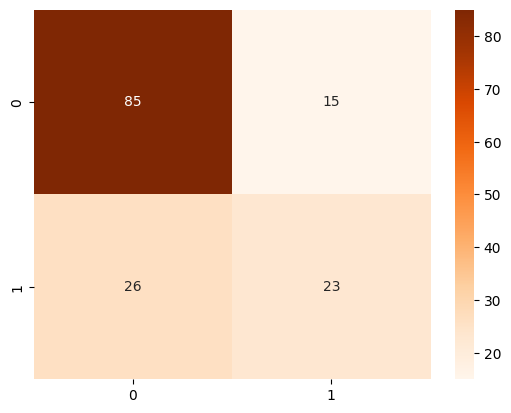

In [59]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Oranges')